<a href="https://colab.research.google.com/github/JammyBeanBag/JammyBeanValorant/blob/Testing/pymongoValorant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This program is designed to handle aggregation and exporting of data for use in analytics.

The motivation behind this is due to a limitation of Henrik's API only able to hold the last 90 games that a given player has participated in. All older games would be deleted. Storing matches in a local cache allows us to look at more matches, giving our analytics more to work with.

## Changelog

4/1/2024
- Imported draw player card function from sister program.
- Added new collection, MMR to keep track of player rank.

3/21/2024
- Added additional query for win stats
  - The way that wins need to be calculated from Riot's logs are really strange. Game modes with more traditional rulesets (unrated, competitive, swiftplay) would require knowing both the player team and finding the winning team. However, in deathmatches (not TDM) we have to manually search the player for statistics and "guess" that this player won if they had 30 eliminations. Deathmatches (again, for some reason not TDM) do not include overall statistics on accuracy, but they can be calculated on a per-kill basis.
  - Because of this, I will be focusing my efforts on the more standard game modes, and adding TDM, with deathmatch being added last.
- Added timePlayed vs. Win Rate visualization.

3/18/2024
- Replaced avgBodyshot,avgHeadshot,avgLegshot with pctHead,pctBody,pctLeg, and added calculated field avgACS in query.
- Fixed dropdown menu in Dash with invisible, but selectable options.
- Added Light vs. Dark mode toggle switch in Dash.
- New query, agentStatsJson for aggregated stats based on each agent.

3/13/2024
- Added Valorant-api for checking episode and act information.
- Multiple queries and aggregations added.

3/11/2024
- Added darkly theme, making it easier on the eyes.
- Added aggregate stats, and a dropdown menu to select the different game modes.
- Added logic to Dash, removing multiple game modes, as they have  potential to skew the data.
  - Removed Custom Games as those are used for practice and nonstandard game rules.
  - Removed Deathmatch as Riot API does not provide important stats like headshots, bodyshots, etc.
  - Removed Spike Rush as Riot API does not provide important stats like headshots, bodyshots, etc.
  - Removed New Map because it pertains to any new map on release, meaning two new maps will be pooled into the same gamemode, even though it's already counted in swiftplay/unrated/competitive.
- Changed pipeline from average session time to average game length, as session time refers to the amount of time the user has been logged in to the game, and not the match itself.

3/7/2024
- Added Experimentation with Dash from plotly. Will continue to iterate to create a dashboard within a notebook.

2/27/2024
- Fixed some bugs with Accuracy.
- Removed some unused code.

2/14/2024
- Added sorting logic to average_stats function, as the queries would return unordered.
- Removed multiple sections of code marked for deletion.
- Added text to Accuracy visualization to indicate percent accuracy of each body part.
- Created new functions get_map_index and parse_kills. Mostly just relocated already existing code to functions and updated them. get_map_index is now a function to locate the correct map selected in valorant-api. parse_kills will go through every kill and categorize them as weapon kills, non-weapon kills, and weird kills. The notes regarding these kills are the same as previously noted.
- Moved more code to the "Main" section.
- Created Accuracy section to differentiate it from the Map section.
- Moved some text output code to debug mode only.
- Reorganization of some sections for better clarity.
- Added overview section for calculating KDA, KDR, ACS, average loadout value, and other aggregate stats.

2/12/2024
- Changed inputCompOnly to inputQueueType. This will allow user to select different modes.
- Added Accuracy visualization. Shows the user what body part they are hitting most often.

2/5/2024
- Updated initialization and setup to use Google Colabs secrets manager.
  - We will no longer need the use of Google Drive for this program.
  - Increased security, as the key is no longer stored as a variable.
- Removed code no longer used.
- Reorganization of sections
- Moved any code not in a defined function to a main section.
  - Substantial amounts of code have been moved into functions and helper functions.
- Many pieces of debugging code relocated inside of functions.

1/24/2024

- Moved some setup code to initialization for faster testing without having to pip install every time.
- Fixed heatmap flipping the image issue.
- Fixed issue with heatmap coloring the entire map. It will now only create "heat dots" on an otherwise original image of the map.
- Moved some early code from Exploration and Setup to debugging mode only for faster testing.
- Switched map plots to dark mode.
- Known issue: When kill data is small especially on edges of the map, then the heat map incorrectly scales points when trying to rescale to fit the entire map. Using pcolormesh is the current solution, but I want to use subplots and eventually add text shadows for better contrast.
- Known issue: When maps get reworked (i.e Lotus and Icebox), then some kill points are going to look OOB. I may have to keep track of when the map gets reworked and re-released, and have some kind of logs to separate the two eras, original map and reworked.

1/23/2024

- Split coordinate conversion function into coordinate_conversion and callout_conversion.
- Removed dots from callout plotting for better clarity.
- Added heatmap projection to map to represent chosen player's location on a kill.
  - Fixed heatmap truncating the entire map.
- Changed how kills are parsed from the returned query. Kills are now binned into 3 separate categories, normal, ability, and weird kills.
  - normal: Both weapon AND ability kills.
  - ability: kills from abilities only.
  - weird: kills not included in the first two categories. i.e knife kills, martyrdom, fall damage, self damage, or bomb kills.
- Known issue: Heatmap now appears to be upside down compared to the drawn map. Although it appears as though the map itself is upside down and the heat map is correct. excluding the heatmap function confirms this.

1/22/2024

- Made updates to killer logic.
  - If killer and victim are the same, then three possible options, either death by falling, self damage, or bomb. Difficult to tell the difference especially if the weapon type is None. These should all be excluded from general analysis anyway, unless specific analysis for this is wanted.
Other weird situations are knife kills, martyrdoms, and ability kills.

1/19/2024

- Upon further investigation, our current source of coordinates is official from Riot, and as such, there are no sources more primary than this. There appear to be no problems reported by anyone else. Since the callouts will not be visible to the user, this shouldn't be a big problem, but may have to manually change some callout coordinates if needed.
- Added some heatmap logic. Will need to add logic to aggregate all kills by the player, and all deaths of the player to create a heatmap of both.  
- Added logic to grab all kills by the player. Deaths and assists will be soon to follow after this is polished.

1/18/2024

- Here is a list of incorrect callouts. It appears that what I receive from the servers in terms of coordinates does not match up with the example that Riot Devs gave us. May have to look at other sources of coordinates.

Fracture's Bridge callout SHOULD give x=11473 and y=-2897 according to Riot devs but I get x=13204 and y=-256
List of incorrect callouts
Ascent: none
Bind: none
Breeze:
1. Lobby
2. Tunnel (unless that's meant to be tunnel)

List of not incorrect but strange placement callouts
Ascent:
1. Lobby
2. Market

Bind:
1. Attacker Spawn
2. Two links

Breeze:
1. Site
2. Arches

1/10/2024

- Added logic to overlay all maps with callouts
- Logic is also now map agnostic
- Created debug mode
- Known Issue: Some callouts appear to be in the wrong location, but not all of them.

12/13/2023

- Added use of valorant-api to overlay official map data
- Added map logic to retrieve map data in a list

11/25/2023

- Added additional aggregations

11/13/2023

- Fixed pipeline so that we can aggregate based on Puuid

11/2/2023

- Switched purpose of this program to handle aggregation and export of data. Maybe we can add parameters as a user input?

10/30/2023

- Created as a Pymongo testing grounds to detect and handle duplicate entries from API and database.

TODO

- Make it so that the heatmap changes with map selection in our dashly dropdown

# Initialization

Setup code that only needs to run once.

## Code

In [ ]:
%pip install pymongo
%pip install pymongoexplain
%pip install dash
%pip install pandas
%pip install dash-bootstrap-components
%pip install dash_bootstrap_templates

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 676.9/676.9 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.7/307.7 kB 20.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 23.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 221.2/221.2 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.8/96.8 kB 1.5 MB/s eta 0:00:00


In [ ]:
from pprint import pprint
from google.colab import drive
import json
from pymongo import MongoClient
%matplotlib inline
import matplotlib.pyplot as plt
from urllib.request import urlopen
from matplotlib import image as mpimg
import matplotlib.patches as patches
from io import BytesIO
import numpy as np
import requests
import os
import time
from google.colab import userdata
from pymongoexplain import ExplainableCollection
from dash import Dash, html, dcc, callback, Output, Input, dash_table
import plotly.express as px
import pandas as pd
import dash_bootstrap_components as dbc
from dash_bootstrap_templates import ThemeSwitchAIO
from dash_bootstrap_templates import load_figure_template

In [ ]:
def initialize():
  # Initializes connection to my local database.
  connect_Mongo()

  # Setting timezone to LA.
  os.environ['TZ'] = 'America/Los_Angeles'
  time.tzset()

In [ ]:
def connect_Mongo():
  # Making Connection to our Mongodb
  mongoClient = MongoClient(userdata.get('MONGODB-CONNECT'))

  # database
  db = mongoClient.ValorantTracking

  # Created or Switched to collection # Need these for other functions, so will keep this global.
  global collectionTesting
  global collectionMatch
  global collectionLifetime
  global collectionAccounts
  global collectionMMR

  collectionTesting = db.Testing
  collectionMatch = db.Match
  collectionLifetime = db.LifetimeHistory
  collectionAccounts = db.Accounts
  collectionMMR = db.MMR

In [ ]:
# While this can go into main, having this here separately allows for initialization for faster testing.
initialize()

# User Input

In [ ]:
#@title **User Input** { run: "auto" }
#@markdown
#@markdown Parameters

inputName = "JellyBeanBag" #@param {type:"string"} # Note that this is case sensitive
inputTag = "420" #@param {type:"string"} # Note that this is case sensitive
inputPuuid = "d026450b-4ad6-53b9-a8f6-25b75627b55c" #@param {type:"string"}
inputQueueType = "Swiftplay" # @param ["Unrated", "Competitive", "Swiftplay"]
inputMap = "Split" #@param ["Ascent", "Bind", "Breeze", "Fracture", "Haven", "Icebox", "Lotus", "Pearl", "Split", "Sunset"]
debug = False #@param {type:"boolean"}

#Setup

In [ ]:
def setup():
  plt.style.use('dark_background') # Essentially dark mode for matplotlib

# Average Stats

This section uses MongoDB's pipeline function to query some aggregate statistics of the player stored in the database.

## Code

In [ ]:
def average_stats():
  pipeline = [
      # Stage 1: Filter by map AND has player in that match
      {
          '$match': {
              '$and': [
                  {'data.players.all_players.puuid': inputPuuid},
                  {'data.metadata.map': inputMap}
              ]
          }
      },
      # Stage 2: Unwind the all_players array so we can aggregate based player stats.
      {
          '$unwind': '$data.players.all_players'
      },
      # Stage 3: Match the specific player based on puuid
      {
          '$match': {
              'data.players.all_players.puuid': inputPuuid
          }
      },
      # Stage 4: Group and calculate the average loadout_value
      {
          '$group': {
              '_id': '$data.metadata.mode',
              'countPlayed': {'$sum': 1},
              'averageLoadoutValue': {'$avg': '$data.players.all_players.economy.loadout_value.average'},
              'averageRoundsPlayed': {'$avg': '$data.metadata.rounds_played'},
              'damageDone': {'$avg': '$data.players.all_players.damage_made'},
              'damageTaken': {'$avg': '$data.players.all_players.damage_received'},
              'averageSessionPlaytime' : {'$avg': '$data.players.all_players.session_playtime.seconds'},
              'averageKills' : {'$avg': '$data.players.all_players.stats.kills'},
              'averageDeaths' : {'$avg': '$data.players.all_players.stats.deaths'},
              'averageAssists' : {'$avg': '$data.players.all_players.stats.assists'},
              'averageScore' : {'$avg': '$data.players.all_players.stats.score'},
              'averageHeadshots' : {'$avg': '$data.players.all_players.stats.headshots'},
              'averageBodyshots' : {'$avg': '$data.players.all_players.stats.bodyshots'},
              'averageLegshots' : {'$avg': '$data.players.all_players.stats.legshots'}
          }
      }
  ]
  averageStats = list(collectionMatch.aggregate(pipeline))
  listIndex = list()
  returnStats = list()

  # Sort list for consistency in order of gamemodes.
  for index, item in enumerate(averageStats):
    if item.get('_id',{})=='Deathmatch':
      listIndex.append(0)
    elif item.get('_id',{})=='Swiftplay':
      listIndex.append(1)
    elif item.get('_id',{})=='Unrated':
      listIndex.append(2)
    elif item.get('_id',{})=='Competitive':
      listIndex.append(3)
  returnStats[:] = [averageStats[i] for i in listIndex] # Need new list for newly ordered list. Trying to reorder in place led to inconsistent results.

  if(debug==True):
    pprint(listIndex)
    pprint(len(returnStats)) # Display number of items resulting from aggregation.
    pprint(returnStats)
  return returnStats


In [ ]:
def calculate_overview(inputQueueType: str, averageStats: list):
  # Grabs the correct aggregations for the selected gamemode.
  aggregateStats = ([i for i in averageStats if i['_id'] == inputQueueType] or [None])[0]

  if(debug==True):
    pprint(aggregateStats)
  kills = aggregateStats.get('averageKills',{})
  deaths = aggregateStats.get('averageDeaths',{})
  assists = aggregateStats.get('averageAssists', {})
  combatScore = aggregateStats.get('averageScore', {})
  roundsPlayed = aggregateStats.get('averageRoundsPlayed', {})
  averageLoadoutValue = aggregateStats.get('averageLoadoutValue', {})
  matchesPlayed = aggregateStats.get('countPlayed', {})

  # Prevent division by zero.
  if(deaths == 0):
    deaths = 1
  if(roundsPlayed == 0):
    roundsPlayed = 1

  KDR = kills / deaths
  KDA = (kills + assists) / deaths
  ACS = combatScore / roundsPlayed
  draw_overview(KDR, KDA, ACS, averageLoadoutValue, matchesPlayed)

In [ ]:
def draw_overview(KDR: float, KDA: float, ACS: float, averageLoadoutValue: float, matchesPlayed: int):
  # Helper function to visualize aggregate values.

  # Plotting the chart
  fig, ax = plt.subplots()

  # Set aspect ratio
  ax.set_aspect('equal', 'box')

  # Set axis limits
  ax.set_xlim(0, 7)
  ax.set_ylim(0, 2)

  # Hide the axes
  plt.axis('off')
  plt.title('Overview' + ' (' + inputQueueType + ')')


  plt.text(2.25,1.5, 'Matches Played: ' + str(matchesPlayed), fontsize=14, color='white')
  plt.text(1.5,1, 'KDR: ' + str(round(KDR, 2)), fontsize=14, color='white')
  plt.text(4.5,1, 'KDA: ' + str(round(KDA, 2)), fontsize=14, color='white')
  plt.text(3,0.5, 'ACS: ' + str(int(round(ACS, 0))), fontsize=14, color='white')
  plt.text(1.5,0, 'Average Loadout Value: ' + str(int(round(averageLoadoutValue, 0))), fontsize=14, color='white')

  plt.show()


# Kills/Deaths

Coding Notes:

player locations on kill only shows the locations of the ALIVE players, meaning you can assume who is dead at this moment in time.

The pipeline as we have it will give us a collection of documents all containing match data. However in kills it will only give us one of the kills the chosen player got in that match, and no other kills. This is expensive on memory, but makes iteration easier. We could make the queries lighter by adding more stages to the pipeline to remove things like round data.


## Code

In [ ]:
def parse_kills():
  # Parses all kills by the player into 3 categories, weapon, non weapon, and weird kills. This will return a 2D list in that respective order.
  pipeline = [
    # Stage 1: Filter by map AND has player in that match
    {
        '$match': {
            '$and': [
                {'data.players.all_players.puuid': inputPuuid},
                {'data.metadata.map': inputMap}
            ]
        }
    },
    # Stage 2: Unwind the kills array
    {
        '$unwind': '$data.kills'
    },
    # Stage 3: Match only the kills by the chosen player
    {
        '$match': {
            'data.kills.killer_puuid': inputPuuid
        }
    }
  ]
  kills = list(collectionMatch.aggregate(pipeline))
  if(debug==True):
    pprint('number of kills returned from query: ' + str(len(kills))) # Display number of items resulting from aggregation.

  # Goes through all the chosen player's kills from query and makes a list of coordinates of where the chosen player is on their kill.
  killPoints = list() # List of all normal kills, which mean weapon and ability kills.
  nonWeaponKills = list() # This is a list of all non-weapon kills i.e abilities.
  weirdKills = list() # This is a more strict list of all abnormal kills i.e falls, bomb, martyrdom, selfdamage AND knives. Bomb kills will have weapon type = bomb.

  for idx, x in enumerate(kills):
    inputPuuidIndex = None
    if((x.get('data',{}).get('kills',{}).get('damage_weapon_name',{}) is None) & (x.get('data',{}).get('kills',{}).get('damage_weapon_id',{}) != '')): # Looks for ability kills
      if(debug==True):
        pprint('Kill #' +str(idx) + ' appended to nonWeaponKills')
      nonWeaponKills.append(x) # May need to make this a broader list if needed.
    if x.get('data',{}).get('kills',{}).get('killer_puuid',{}) != x.get('data',{}).get('kills',{}).get('victim_puuid',{}): # This prevents fall damage kills
      for index,y in enumerate(x.get('data',{}).get('kills',{}).get('player_locations_on_kill',{})):
        if y.get('player_puuid',{}) == inputPuuid:
          if(debug==True):
            pprint(inputPuuid + ' found at index ' + str(index))
          inputPuuidIndex = index
          break
    if(debug==True):
      pprint('Kill #' + str(idx))
    if(inputPuuidIndex is not None):
      if(debug == True):
        pprint('inputPuuidIndex for match: ' + x.get('data',{}).get('metadata', {}).get('matchid', {}) + ': ' + str(inputPuuidIndex))
      point = x.get('data', {}).get('kills', {}).get('player_locations_on_kill', {})[inputPuuidIndex].get('location', {})
      if(debug==True):
        pprint(point)
      killPoints.append(point)
    if(inputPuuidIndex is None):
      weirdKills.append(x)

  if(debug==True):
    pprint('killPoints[0]: ' + str(killPoints[0]))
    pprint('killPoints size: ' + str(len(killPoints)))
    pprint('nonWeaponKills size: ' + str(len(nonWeaponKills)))
    pprint('weirdKills size: ' + str(len(weirdKills)))

  if(debug==True):
    nonWeaponKills[0].get('data',{}).get('kills',{})

  allKills = [killPoints, nonWeaponKills, weirdKills]
  return allKills

# Map

This section is responsible for drawing the map and creating a heatmap visualization of the player's kills on that map.

## Code

In [ ]:
def get_map_data() :
  #This fetches official map data from valorant-api. Special thanks to those at valorant-api.com
  url = 'https://valorant-api.com/v1/maps'

  try:
    response = requests.get(url)
  except:
    print('Error: get_map_data failed.')

  if response.status_code == 200:
    data = response.json()  # Parse the JSON response
    if(debug==True):
      print(data)
  else:
      print(f"Request failed with status code {response.status_code}")
      print(response.text)  # Print the response content for further information

  return data


In [ ]:
def get_map_index(map):
  # Locates map
  for idx, x in enumerate(map):
      if x.get('displayName',{}) == inputMap:
        if(debug == True):
          print("Found " + x.get('displayName',{}) + " at index " + str(idx) + "!")
        mapIndex = idx
        break

  # Display the chosen map data
  if(debug==True):
    pprint(map[mapIndex])
    pprint(map[mapIndex].keys())
  # uuid
  # displayName: map name
  # narrativeDescription: just lore
  # tacticalDescription: talks about things like 2 bomb sites etc
  # coordinates: more lore, coordinates of the map
  # displayIcon: url to the actual map overlay
  # listViewIcon: the splash image of the map but the list/mini version
  # splash: the splash image of the loading
  # assetPath: not useful for us, but the the filepath of the asset
  # mapUrl: we could use this for url requests
  # xMultiplier: used for coordinate conversion
  # yMultiplier: used for coordinate conversion
  # xScalarToAdd: used for coordinate conversion
  # yScalarToAdd: used for coordinate conversion
  # callouts: used to section the map off into regions (i.e long) and super regions(i.e A or mid)

  return mapIndex

In [ ]:
def draw_map(chosenMap : dict, killPoints : list):
  # Draw the map and plot callouts

  # URL of the image you want to display
  image_url = chosenMap.get('displayIcon')

  # Fetch the image from the URL
  response = urlopen(image_url)
  img_data = response.read()

  # Convert the image data to a NumPy array
  img = mpimg.imread(BytesIO(img_data), format='png')

  # Get height and width of the image
  # The underscore is a depth, but that is not needed.
  imgHeight, imgWidth, _ = img.shape
  imgHeight = float(imgHeight)
  imgWidth = float(imgWidth)
  if(debug == True):
    print(f"Image Height: {imgHeight}, Width: {imgWidth}")

  # Display the image using Matplotlib
  plt.imshow(img, origin='upper')
  plt.axis('off')  # Turn off axis labels
  plt.title(chosenMap.get('displayName', {}))

  # Call helper function
  draw_callouts(imgHeight, imgWidth, chosenMap)
  plot_heatmap(killPoints, imgHeight, imgWidth, chosenMap)
  plt.show()

In [ ]:
def draw_callouts(imgHeight : float, imgWidth: float, chosenMap: dict) -> None:
  callouts = chosenMap.get('callouts',{}) # list of callouts provided by Riot
  points = []
  if(debug == True):
    pprint('Coordinates before conversion: ')
  # iterate through all callouts and create a list of tuples for plotting in matplotlib
  for idx, coordinate in enumerate(callouts):
    x = float(coordinate.get('location', {}).get('x', {}))
    y = float(coordinate.get('location', {}).get('y', {}))
    region = coordinate.get('regionName', {})
    superregion = coordinate.get('superRegionName', {})
    if(debug == True):
      print(f"x: {x}, y: {y}, Region: {region}, Superregion: {superregion}")
    newPoint = callout_conversion(x, y, imgHeight, imgWidth, chosenMap, region, superregion)
    points.append(newPoint) # Calls helper function
  if(debug == True):
    pprint('Coordinates after conversion: ')
    pprint(points)

  # Plot points on the image
  for i, point in enumerate(points):
      #color = cmap(i)  # Assign colors based on the index in the colormap # only used at the beginning to different dots. MFD
      plt.scatter(point[0], point[1], label=f"{point[2]}", color='white', marker='o', s=2, alpha=0)
      plt.annotate(f"{point[2]}", (point[0], point[1]), textcoords="offset points", xytext=(0, -1), ha='center', fontsize=7.0)
  if(debug==True):
    plt.scatter(10,10,label='ORIGIN',color='red', marker='o', s=60, alpha=1.0) # used for debugging. MFD
    plt.annotate('ORIGIN', (10,10), xytext=(0,-1), ha='center',fontsize=12)
  #plt.show() # plt.show here will show only the map with the callouts and nothing else. Can maybe make as a toggleable option.

In [ ]:
def plot_heatmap(killPoints: list, imgHeight: float, imgWidth: float, chosenMap: dict):
  # Used to draw the heat map given a set of coordinates.
  # There is surely a better way to optimize this.

  killCoords = list()
  # Extract x and y coordinates from killPoints
  #x_coords, y_coords = zip(*[(float(point['x']), float(point['y'])) for point in killPoints])
  for idx, x in enumerate(killPoints):
    #pprint('before: ' + str(x.get('x',{})) + ', ' + str(x.get('y', {})) + '-->after: ' + str(coordinate_conversion(float(x.get('x',{})), float(x.get('y',{})), imgHeight, imgWidth, chosenMap)))
    killCoords.append(coordinate_conversion(float(x.get('x',{})), float(x.get('y',{})), imgHeight, imgWidth, chosenMap))

  x_coords = list()
  y_coords = list()
  if(debug==True):
    pprint(killCoords[0])
  for idx, x in enumerate(killCoords):
    #pprint('x: ' + str(x[0]) + ' y: ' + str(x[1]))
    x_coords.append(x[0])
    y_coords.append(x[1])

  # Create a 2D histogram to calculate the density of points
  heatmap, xedges, yedges = np.histogram2d(x_coords, y_coords, bins=(50,50)) #increase bins if you want to smooth out the heatdots
  #xedges and yedges are nparrays of the coordinates. We don't actually need those. MFD but more like marked for change.
  heatmap_copy = heatmap.transpose()
  heatmap_copy[heatmap_copy==0] = np.nan

  # Create extent for the heatmap
  #extent = [xedges[0], xedges[-1], yedges[-1], yedges[0]] # this causes a zoomed in picture of the map, especially if there's not enough data on the edges of the map.
  #extent = [0, imgWidth, imgHeight, 0]
  plt.pcolormesh(xedges, yedges,  heatmap.transpose(), cmap='viridis', vmin=-7, vmax=7, alpha=0.60)
  plt.gcf().set_size_inches(8, 8)
  plt.gca().set_aspect('equal')

  # Plot the heatmap on the existing map
  #plt.imshow(heatmap.T, extent=extent, origin='upper', cmap='Blues', alpha=0.85)  # Adjust alpha for transparency # we could subplot or use  pcolormesh instead of a second imshow.


In [ ]:
def callout_conversion(inputX: float, inputY: float, imgHeight : float, imgWidth: float, chosenMap: dict, region: str, superregion: str) -> tuple:
  # This function is specfically for converting the map callouts using coordinate converision.
  x,y = coordinate_conversion(inputX, inputY, imgHeight, imgWidth, chosenMap)
  return (x,y, region, superregion)

In [ ]:
def coordinate_conversion(inputX: float, inputY: float, imgHeight : float, imgWidth: float, chosenMap: dict) -> tuple:
  # Function to convert coordinates into ones usable for plotting on the map icon.
  # Formula provided by Riot developer
  #x = game_y * valorant-api_map_x_multiplier + valorant-api_map_x_scalar_add;
  #y = game_x * valorant-api_map_y_multiplier + valorant-api_map_y_scalar_add;
  x = inputY * float(chosenMap.get('xMultiplier', {})) + float(chosenMap.get('xScalarToAdd', {}));
  y = inputX * float(chosenMap.get('yMultiplier', {})) + float(chosenMap.get('yScalarToAdd', {}));

  x *= imgWidth;
  y *= imgHeight;

  return (x,y)

# Accuracy

This section calculates accuracy of shots and creates a small visualization.

## Code

In [ ]:
# Calculates shot accuracy and draws a visualization.
def calculate_accuracy_chart(inputQueueType: str):
  # Grabs the correct aggregations for the selected gamemode.
  aggregateStats = ([i for i in averageStats if i['_id'] == inputQueueType] or [None])[0]

  if(debug==True):
    pprint(aggregateStats)
  if(inputQueueType != 'Deathmatch'):
    sumShots = aggregateStats.get('averageBodyshots',{}) + aggregateStats.get('averageLegshots',{}) + aggregateStats.get('averageHeadshots',{})
    if(sumShots == 0):
      sumShots = 1
    percentHeadshots = round(((aggregateStats.get('averageHeadshots', {}) / sumShots) * 100), 1)
    percentBodyshots = round(((aggregateStats.get('averageBodyshots', {}) / sumShots) * 100), 1)
    percentLegshots = round(((aggregateStats.get('averageLegshots', {}) / sumShots) * 100), 1)
    if(debug==True):
      pprint(str(percentHeadshots) + ' ' + str(percentBodyshots) + ' ' + str(percentLegshots))

    draw_accuracy_chart(percentHeadshots, percentBodyshots, percentLegshots)

In [ ]:
# Helper function.
def draw_accuracy_chart(percentHeadshots, percentBodyshots, percentLegshots):
    headColor = 'gray'
    bodyColor = 'gray'
    legColor = 'gray'
    highlightLimb = 10

    # Compare the variables
    if percentHeadshots >= percentBodyshots and percentHeadshots >= percentLegshots:
        headColor = 'skyblue'
        highlightLimb = 0
    elif percentBodyshots >= percentHeadshots and percentBodyshots >= percentLegshots:
        bodyColor = 'skyblue'
        highlightLimb = 1
    else:
        legColor = 'skyblue'
        highlightLimb = 2

    # Plotting the chart
    fig, ax = plt.subplots()

    # Draw head
    head = plt.Circle((0.1, 0.55), 0.08, color=headColor, label='Head')
    ax.add_patch(head)

    # Draw body
    body = plt.Line2D([0.1, 0.1], [0.43, 0.26], linewidth=11, color=bodyColor, label='Body')
    ax.add_line(body)

    # Draw arms
    arm_length = 0.12
    left_arm = plt.Line2D([0.1, 0.1-arm_length * 0.6], [0.425, 0.425 - arm_length], linewidth=9, color=bodyColor, label='Left Arm')
    right_arm = plt.Line2D([0.1, 0.1+arm_length * 0.6], [0.425, 0.425 - arm_length], linewidth=9, color=bodyColor, label='Right Arm')
    ax.add_line(left_arm)
    ax.add_line(right_arm)

    # Draw legs
    leg_length = 0.12
    left_leg = plt.Line2D([0.1, 0.1 - leg_length * 0.6], [0.2, 0.2 - leg_length], linewidth=9, color=legColor, label='Left Leg')
    right_leg = plt.Line2D([0.1, 0.1 + leg_length * 0.6], [0.2, 0.2 - leg_length], linewidth=9, color=legColor, label='Right Leg')
    ax.add_line(left_leg)
    ax.add_line(right_leg)

    # Set aspect ratio
    ax.set_aspect('equal', 'box')

    # Set axis limits
    ax.set_xlim(0, 0.6)
    ax.set_ylim(0, 0.65)


    # Hide the axes
    plt.axis('off')
    plt.title('Accuracy')
    accuracy_chart_text(percentHeadshots, percentBodyshots, percentLegshots, highlightLimb)
    plt.show()


In [ ]:
# Helper function.
def accuracy_chart_text(percentHeadshots, percentBodyshots, percentLegshots, highlightLimb: int):
  headColor = 'white'
  bodyColor = 'white'
  legColor = 'white'
  match highlightLimb:
    case 0:
      headColor = 'skyblue'
    case 1:
      bodyColor = 'skyblue'
    case 2:
      legColor = 'skyblue'

  # Head
  plt.text(0.22, 0.55, 'Head', fontsize=14, color='white')
  plt.text(0.37, 0.545, str(percentHeadshots) + '%', fontsize=24, color=headColor)

  # Body
  plt.text(0.22, 0.35, 'Body', fontsize=14, color='white')
  plt.text(0.37, 0.345, str(percentBodyshots) + '%', fontsize=24, color=bodyColor)

  # Leg
  plt.text(0.22, 0.16, 'Legs', fontsize=14, color='white')
  plt.text(0.37, 0.155, str(percentLegshots) + '%', fontsize=24, color=legColor)

# Draw Player Card

In [ ]:
def get_rank_info(inputName, inputTag):
  # Use case-insensitive regular expressions for 'name' and 'tag' fields
  query = {
    'data.name': {'$regex': f'^{inputName}$', '$options': 'i'},
    'data.tag': {'$regex': f'^{inputTag}$', '$options': 'i'}
  }
  existingMMR = collectionMMR.find_one(query)

  if existingMMR:
    return existingMMR
  return {}

In [ ]:
def get_account(inputName, inputTag):
  # Use case-insensitive regular expressions for 'name' and 'tag' fields
  query = {
    'name': {'$regex': f'^{inputName}$', '$options': 'i'},
    'tag': {'$regex': f'^{inputTag}$', '$options': 'i'}
  }
  existingAccount = collectionAccounts.find_one(query)

  if existingAccount:
    return existingAccount
  return {}

In [ ]:
from PIL import Image
from PIL import ImageDraw
from PIL import ImageFont

# we need link for accountcardwide


# Draws the player card and some ranked information about the player on the card.
def draw_player_card(inputName, inputTag):
  # Retrieve account details from database.
  account = get_account(inputName, inputTag)
  if account == {}:
    return False

  # Grab mmr details and find current rank.
  rankIcon = get_rank_info(inputName, inputTag)

  # Grab rank information from valorant API.
  #rankData = get_rank_data()

  # Opening the primary image (used in background)
  response = requests.get(account.get('cardWide'))
  img1 = Image.open(BytesIO(response.content))

  # Opening the secondary image (overlay image)
  #response = requests.get(rankData.get('tiers', {})[rankIcon.current_data.currenttier].get('smallIcon',{})) # need to change this to be rank agnostic
  response = requests.get(rankIcon.get('data').get('current_data').get('images').get('small'))
  img2 = Image.open(BytesIO(response.content))

  # Pasting rank icon(img2) on top of playercard(img1)
  img1.paste(img2, (2,28), mask = img2)

  # Call draw Method to add 2D graphics in an image
  I1 = ImageDraw.Draw(img1)

  # Custom font style and font size
  fnt1 = ImageFont.truetype(r'/usr/share/font/truetype/liberation/LiberationMono-Bold.ttf', 17)
  fnt2 = ImageFont.truetype(r'/usr/share/font/truetype/liberation/LiberationMono-Bold.ttf', 14)

  # Add text shadow by offseting 1 in the 4 corners.
  # Shadow for name
  I1.text((6,4), account.get('name') + '#' + account.get('tag'), font=fnt1, fill='black')
  I1.text((8,4), account.get('name') + '#' + account.get('tag'), font=fnt1, fill='black')
  I1.text((6,6), account.get('name') + '#' + account.get('tag'), font=fnt1, fill='black')
  I1.text((8,6), account.get('name') + '#' + account.get('tag'), font=fnt1, fill='black')
  # Shadow for rank
  I1.text((6,92), rankIcon.get('data').get('current_data').get('currenttierpatched'), font=fnt2, fill='black')
  I1.text((8,92), rankIcon.get('data').get('current_data').get('currenttierpatched'), font=fnt2, fill='black')
  I1.text((6,94), rankIcon.get('data').get('current_data').get('currenttierpatched'), font=fnt2, fill='black')
  I1.text((8,94), rankIcon.get('data').get('current_data').get('currenttierpatched'), font=fnt2, fill='black')
  # Shadow for level
  I1.text((6,107), 'Level:' + str(account.get('level')), font=fnt2, fill='black')
  I1.text((8,107), 'Level:' + str(account.get('level')), font=fnt2, fill='black')
  I1.text((6,109), 'Level:' + str(account.get('level')), font=fnt2, fill='black')
  I1.text((8,109), 'Level:' + str(account.get('level')), font=fnt2, fill='black')
  # Shadow for region
  I1.text((367,4), 'Region:' + account.get('region').upper(), font=fnt2, fill='black')
  I1.text((367,6), 'Region:' + account.get('region').upper(), font=fnt2, fill='black')
  I1.text((369,4), 'Region:' + account.get('region').upper(), font=fnt2, fill='black')
  I1.text((369,6), 'Region:' + account.get('region').upper(), font=fnt2, fill='black')
  # Add Text to an image
  I1.text((7, 5), account.get('name') + '#' + account.get('tag'), font=fnt1, fill=(255, 255, 255)) # name
  I1.text((7,93), rankIcon.get('data').get('current_data').get('currenttierpatched'), font=fnt2, fill=(255,255,255)) # rank
  I1.text((7,108), 'Level:' + str(account.get('level')), font=fnt2, fill=(255,255,255)) # level
  I1.text((368,5), 'Region:' + account.get('region').upper(), font=fnt2, fill=(255,255,255)) # region

  display(img1)

# Rank

In [ ]:
def get_rank_data () :
  #This fetches official rank data from valorant-api. Special thanks to those at valorant-api.com
  url = 'https://valorant-api.com/v1/seasons'

  try:
    response = requests.get(url)
  except:
    print('Error: get_rank_data failed.')

  if response.status_code == 200:
    data = response.json()  # Parse the JSON response
    if(debug==True):
      print(data)
  else:
      print(f"Request failed with status code {response.status_code}")
      if(debug==True):
        print(response.text)  # Print the response content for further information
  if(debug==True):
    pprint(data) # Shows all the ranks from each Episode. Noting things like Ascendant only existed in Episode 5+.
  #data = format_rank_data(data)
  return data

# Main/Output

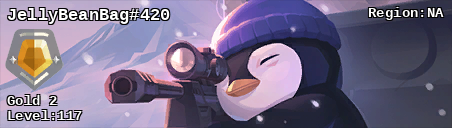

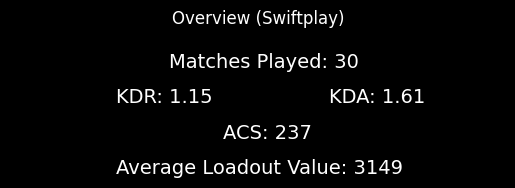

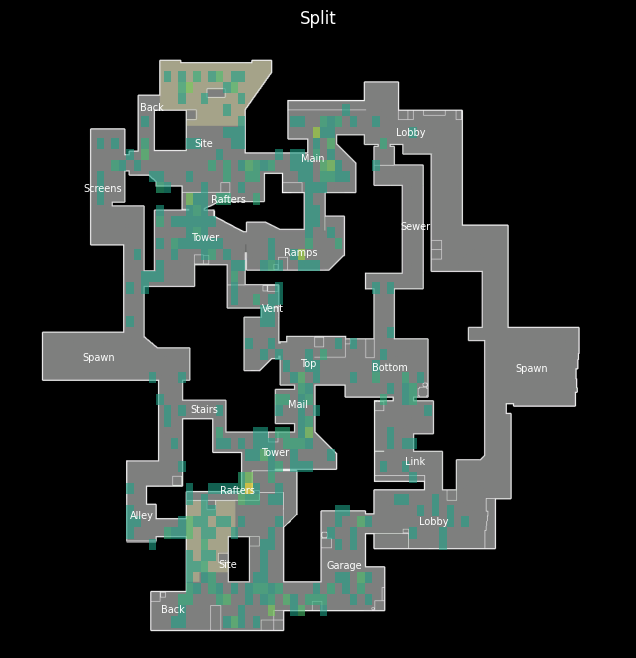

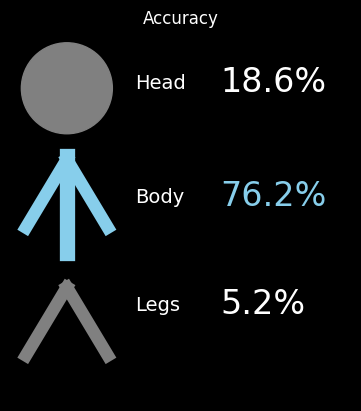

In [ ]:
setup()

draw_player_card(inputName, inputTag) # draws player card.

averageStats = average_stats() # Aggregate stats of the player.

calculate_overview(inputQueueType, averageStats)

allKills = parse_kills() # 2D Array of all kills by the player.

# Grab all the map data
# This is a list of all the maps in the game, along with any pertinent information regarding each map.
map = get_map_data().get('data',{})

mapIndex = get_map_index(map) # Finds the map index of the selected map.

draw_map(map[mapIndex], allKills[0]) # Shows the selected map, with a heatmap of kills on the map.

calculate_accuracy_chart(inputQueueType) # Creates a visualization of the shot accuracy of the player.

# Exploration

This function provides ranked act and episode metadata. Acts will have a parent uuid which is the uuid of the episode itself. match metadata contains the act, which we can use to identify the season using the seasons API.

In [ ]:
get_rank_data() # retrive act and episode information.

{'status': 200,
 'data': [{'uuid': '0df5adb9-4dcb-6899-1306-3e9860661dd3',
   'displayName': 'Closed Beta',
   'type': None,
   'startTime': '2020-04-06T16:00:00Z',
   'endTime': '2020-05-29T06:59:00Z',
   'parentUuid': None,
   'assetPath': 'ShooterGame/Content/Seasons/Season_CB_DataAsset'},
  {'uuid': '3f61c772-4560-cd3f-5d3f-a7ab5abda6b3',
   'displayName': 'ACT 1',
   'type': 'EAresSeasonType::Act',
   'startTime': '2020-06-01T07:00:00Z',
   'endTime': '2020-08-04T00:00:00Z',
   'parentUuid': 'fcf2c8f4-4324-e50b-2e23-718e4a3ab046',
   'assetPath': 'ShooterGame/Content/Seasons/Season_Episode1_Act1_DataAsset'},
  {'uuid': '0530b9c4-4980-f2ee-df5d-09864cd00542',
   'displayName': 'ACT 2',
   'type': 'EAresSeasonType::Act',
   'startTime': '2020-08-04T00:00:00Z',
   'endTime': '2020-10-13T00:00:00Z',
   'parentUuid': 'fcf2c8f4-4324-e50b-2e23-718e4a3ab046',
   'assetPath': 'ShooterGame/Content/Seasons/Season_Episode1_Act2_DataAsset'},
  {'uuid': '46ea6166-4573-1128-9cea-60a15640059b',
 

In [ ]:
pipelineExplore = [ #mfd
    # Stage 1: Filter by map AND has player in that match
    {
        '$match': {
            '$and': [
                {'data.players.all_players.puuid': inputPuuid},
                #{'data.metadata.map': inputMap}
            ]
        }
    }
]

exploreSet = list(collectionMatch.aggregate(pipelineExplore))
pprint(exploreSet[0].get('data',{}).get('metadata',{}))

{'cluster': 'US West (N. California)',
 'game_length': 711,
 'game_start': 1698371613,
 'game_start_patched': 'Friday, October 27, 2023 1:53 AM',
 'game_version': 'release-07.08-shipping-4-1007528',
 'map': 'Sunset',
 'matchid': 'f8e485af-66c0-4073-af32-a99716d94306',
 'mode': 'Swiftplay',
 'mode_id': 'swiftplay',
 'platform': 'PC',
 'premier_info': {'matchup_id': None, 'tournament_id': None},
 'queue': 'Swiftplay',
 'region': 'na',
 'rounds_played': 6,
 'season_id': '03dfd004-45d4-ebfd-ab0a-948ce780dac4'}


In [ ]:
pipelineSeason = [ #mfd
    # Stage 1: Filter by map AND has player in that match
    {
        '$match': {
            '$and': [
                {'data.players.all_players.puuid': inputPuuid},
                #{'data.metadata.map': inputMap}
            ]
        }
    },
    {
        '$group': {'_id': '$data.metadata.season_id'}
    },
    {
        '$sort': {'_id': -1}
    }

]

seasonSet = list(collectionMatch.aggregate(pipelineSeason))
pprint(seasonSet)

[{'_id': 'ec876e6c-43e8-fa63-ffc1-2e8d4db25525'},
 {'_id': '7a85de9a-4032-61a9-61d8-f4aa2b4a84b6'},
 {'_id': '67e373c7-48f7-b422-641b-079ace30b427'},
 {'_id': '4401f9fd-4170-2e4c-4bc3-f3b4d7d150d1'},
 {'_id': '34093c29-4306-43de-452f-3f944bde22be'},
 {'_id': '22d10d66-4d2a-a340-6c54-408c7bd53807'},
 {'_id': '0981a882-4e7d-371a-70c4-c3b4f46c504a'},
 {'_id': '03dfd004-45d4-ebfd-ab0a-948ce780dac4'}]


In [ ]:
#Find all matches and sort it by game start in epoch. Descending order.
exploreSet = collectionMatch.find({}).sort('data.metadata.game_start', -1)
#exploreSet[0]

In [ ]:
#Find all matches with this season and sort it by game start in epoch. Descending order.
exploreSet = collectionMatch.find({'data.metadata.season_id': '22d10d66-4d2a-a340-6c54-408c7bd53807'}).sort('data.metadata.game_start', -1)
exploreSet[0]

{'_id': ObjectId('660b69d13d6db15ce39e4091'),
 'status': 200,
 'data': {'metadata': {'map': 'Ascent',
   'game_version': 'release-08.05-shipping-13-2404755',
   'game_length': 332,
   'game_start': 1712022031,
   'game_start_patched': 'Tuesday, April 2, 2024 3:40 AM',
   'rounds_played': 1,
   'mode': 'Deathmatch',
   'mode_id': 'deathmatch',
   'queue': 'Deathmatch',
   'season_id': '22d10d66-4d2a-a340-6c54-408c7bd53807',
   'platform': 'PC',
   'matchid': '7523be0c-6476-451d-aa08-d9702a9d0e29',
   'premier_info': {'tournament_id': None, 'matchup_id': None},
   'region': 'na',
   'cluster': 'US West (N. California)'},
  'players': {'all_players': [{'puuid': 'ce8ea4a8-cfe1-5176-aa3b-7e4bcbbd4a6e',
     'name': 'Wesabi',
     'tag': '55555',
     'team': 'ce8ea4a8-cfe1-5176-aa3b-7e4bcbbd4a6e',
     'level': 132,
     'character': 'Yoru',
     'currenttier': 0,
     'currenttier_patched': 'Unrated',
     'player_card': '8106e1dc-45ca-8160-75cf-d288a51bd891',
     'player_title': '96bbed0

# Dash Experimentation

In [ ]:
# Aggregate Stats pipeline
pipeline = [
    # Stage 1: Filter by map AND has player in that match
    {
        '$match': {
            '$and': [
                {'data.players.all_players.puuid': inputPuuid},
                #{'data.metadata.map': inputMap},
            ]
        }
    },
    # Stage 2: Unwind the all_players array so we can aggregate based player stats.
    {
        '$unwind': '$data.players.all_players'
    },
    # Stage 3: Match the specific player based on puuid
    {
        '$match': {
            'data.players.all_players.puuid': inputPuuid
        }
    },
    # Stage 4: Group and calculate the average loadout_value
    {
        '$group': {
            '_id': '$data.metadata.mode',
            'countPlayed': {'$sum': 1},
            'avgLoadoutValue': {'$avg': '$data.players.all_players.economy.loadout_value.average'},
            'avgRoundsPlayed': {'$avg': '$data.metadata.rounds_played'},
            'damageDone': {'$avg': '$data.players.all_players.damage_made'},
            'damageTaken': {'$avg': '$data.players.all_players.damage_received'},
            'avgGameLength': {'$avg': {'$divide': ['$data.metadata.game_length', 60]}},  # in minutes
            'avgKills' : {'$avg': '$data.players.all_players.stats.kills'},
            'avgDeaths' : {'$avg': '$data.players.all_players.stats.deaths'},
            'avgAssists' : {'$avg': '$data.players.all_players.stats.assists'},
            'avgACS' : {'$avg': {'$divide': ['$data.players.all_players.stats.score','$data.metadata.rounds_played']}}, # Average ACS
            'avgHeadshots' : {'$avg': '$data.players.all_players.stats.headshots'},
            'avgBodyshots' : {'$avg': '$data.players.all_players.stats.bodyshots'},
            'avgLegshots' : {'$avg': '$data.players.all_players.stats.legshots'}
        }
    }
]
averageStatsJson = list(collectionMatch.aggregate(pipeline))

In [ ]:
# Aggregate stats by agent.
pipeline = [
    # Stage 1: Filter by map AND has player in that match
    {
        '$match': {
            '$and': [
                {'data.players.all_players.puuid': inputPuuid},
                #{'data.metadata.map': inputMap}
                {
                '$or' : [
                    {'data.metadata.mode': 'Swiftplay'},
                    {'data.metadata.mode': 'Competitive'},
                    {'data.metadata.mode': 'Unrated'}
                ]
                }
                #{'data.metadata.mode': 'Swiftplay'}
            ]
        }
    },
    # Stage 2: Unwind the all_players array so we can aggregate based player stats.
    {
        '$unwind': '$data.players.all_players'
    },
    # Stage 3: Match the specific player based on puuid
    {
        '$match': {
            'data.players.all_players.puuid': inputPuuid
        }
    },
    # Stage 4: Remove documents with zero
    {
        '$match': {
            'data.players.all_players.stats.headshots' : {'$ne': 0},
            'data.players.all_players.stats.bodyshots' : {'$ne': 0},
            'data.players.all_players.stats.legshots' : {'$ne': 0}
        }
    },
    # Stage 5: Group and calculate the average loadout_value
    {
        '$group': {
            '_id': '$data.players.all_players.character',
            'countPlayed': {'$sum': 1},
            'timePlayed': {'$sum': {'$divide': ['$data.metadata.game_length', 60]}},  # in minutes
            'damageDelta': {'$avg': {'$subtract': ['$data.players.all_players.damage_made', '$data.players.all_players.damage_received']}},
            'avgKills' : {'$avg': '$data.players.all_players.stats.kills'},
            'avgDeaths' : {'$avg': '$data.players.all_players.stats.deaths'},
            'avgAssists' : {'$avg': '$data.players.all_players.stats.assists'},
            'avgACS' : {'$avg': {'$divide': ['$data.players.all_players.stats.score','$data.metadata.rounds_played']}}, # Average ACS
            'pctHeadshots': {'$avg':
                {'$multiply':
                  [100,
                    {'$divide':
                      ['$data.players.all_players.stats.headshots',
                        {'$sum':  ['$data.players.all_players.stats.headshots',
                                  '$data.players.all_players.stats.bodyshots',
                                  '$data.players.all_players.stats.legshots'
                                  ]
                        }
                      ]
                    }
                  ]
                }
              },
            'pctBodyshots': {'$avg':
                {'$multiply':
                  [100,
                    {'$divide':
                      ['$data.players.all_players.stats.bodyshots',
                        {'$sum':  ['$data.players.all_players.stats.headshots',
                                  '$data.players.all_players.stats.bodyshots',
                                  '$data.players.all_players.stats.legshots'
                                  ]
                        }
                      ]
                    }
                  ]
                }
              },
            'pctLegshots': {'$avg':
                            {'$multiply':
                              [100,
                                {'$divide':
                                  ['$data.players.all_players.stats.legshots',
                                    {'$sum':  ['$data.players.all_players.stats.headshots',
                                              '$data.players.all_players.stats.bodyshots',
                                              '$data.players.all_players.stats.legshots'
                                              ]
                                    }
                                  ]
                                }
                              ]
                            }
                          }
        }
    }
]
agentStatsJson = list(collectionMatch.aggregate(pipeline))

In [ ]:
# Aggregate stats by agent.
pipeline = [
    # Stage 1: Filter by map AND has player in that match
    {
        '$match': {
            '$and': [
                {'data.players.all_players.puuid': inputPuuid},
                #{'data.metadata.map': inputMap}
                {
                '$or' : [
                    # {'data.metadata.mode': 'Deathmatch'},
                    {'data.metadata.mode': 'Swiftplay'},
                    {'data.metadata.mode': 'Competitive'},
                    {'data.metadata.mode': 'Unrated'}
                ]
                }
                #{'data.metadata.mode': 'Swiftplay'}
            ]
        }
    },
    # Stage 2: Unwind the all_players array so we can aggregate based player stats.
    {
        '$unwind': '$data.players.all_players'
    },
    # Stage 3: Match the specific player based on puuid
    {
        '$match': {
            'data.players.all_players.puuid': inputPuuid
        }
    },
    # Stage 4: Remove documents with zero
    {
        '$match': {
            'data.players.all_players.stats.headshots' : {'$ne': 0},
            'data.players.all_players.stats.bodyshots' : {'$ne': 0},
            'data.players.all_players.stats.legshots' : {'$ne': 0}
        }
    },
    # I have three variables, our players team and if blue team won and if red team won. I need to use the players team to see if they won that match.
    # # Stage 5: Group and find all winning matches
    #     '$match': {
    #         'data.players.all_players.team' :
    #     }
    # # Stage 5: Group and calculate the average loadout_value
    # {
    #     '$group': {
    #         '_id': '$data.players.all_players.character',
    #         'countPlayed': {'$sum': 1},
    #         'timePlayed': {'$sum': {'$divide': ['$data.metadata.game_length', 60]}},  # in minutes
    #         'damageDelta': {'$avg': {'$subtract': ['$data.players.all_players.damage_made', '$data.players.all_players.damage_received']}},

    #     }
    # }
]
agentWinStatsJson1 = list(collectionMatch.aggregate(pipeline))

In [ ]:
pipeline = [
    # Stage 1: Filter by map AND has player in that match
    {
        '$match': {
            '$and': [
                {'data.players.all_players.puuid': inputPuuid},
                {'$or' : [
                    {'data.metadata.mode': 'Swiftplay'},
                    {'data.metadata.mode': 'Competitive'},
                    {'data.metadata.mode': 'Unrated'}
                ]}
            ]
        }
    },
    # Stage 2: Unwind the all_players array so we can aggregate based player stats.
    {
        '$unwind': '$data.players.all_players'
    },
    # Stage 3: Match the specific player based on puuid
    {
        '$match': {
            'data.players.all_players.puuid': inputPuuid
        }
    },
    # Stage 4: Remove documents with zero
    {
        '$match': {
            'data.players.all_players.stats.headshots' : {'$ne': 0},
            'data.players.all_players.stats.bodyshots' : {'$ne': 0},
            'data.players.all_players.stats.legshots' : {'$ne': 0}
        }
    },
    # Stage 5: Group and calculate the total number of wins by agent
    {
        '$group': {
            '_id': '$data.players.all_players.character',
            'totalWins': {
                '$sum': {
                    '$cond': [
                        {'$eq': ['$data.teams.red.has_won', True]}, # Red team won
                        {'$cond': [{'$eq': ['$data.players.all_players.team', 'Red']}, 1, 0]}, # Player in red team
                        {'$cond': [
                            {'$eq': ['$data.teams.blue.has_won', True]}, # Blue team won
                            {'$cond': [{'$eq': ['$data.players.all_players.team', 'Blue']}, 1, 0]}, # Player in blue team
                            0  # Neither red nor blue team won. Usually a draw or match terminated.
                        ]}
                    ]
                }
            }
        }
    }
]

agentWinStatsJson = list(collectionMatch.aggregate(pipeline))


In [ ]:
agentWinStatsJson

[{'_id': 'Killjoy', 'totalWins': 11},
 {'_id': 'Sage', 'totalWins': 13},
 {'_id': 'Astra', 'totalWins': 1},
 {'_id': 'Neon', 'totalWins': 9},
 {'_id': 'Harbor', 'totalWins': 4},
 {'_id': 'Fade', 'totalWins': 2},
 {'_id': 'Skye', 'totalWins': 7},
 {'_id': 'KAY/O', 'totalWins': 13},
 {'_id': 'Raze', 'totalWins': 10},
 {'_id': 'Sova', 'totalWins': 2},
 {'_id': 'Reyna', 'totalWins': 6},
 {'_id': 'Breach', 'totalWins': 3},
 {'_id': 'Omen', 'totalWins': 7},
 {'_id': 'Brimstone', 'totalWins': 10},
 {'_id': 'Chamber', 'totalWins': 3},
 {'_id': 'Deadlock', 'totalWins': 1},
 {'_id': 'Jett', 'totalWins': 13},
 {'_id': 'Gekko', 'totalWins': 5},
 {'_id': 'Iso', 'totalWins': 2},
 {'_id': 'Yoru', 'totalWins': 5},
 {'_id': 'Phoenix', 'totalWins': 3},
 {'_id': 'Viper', 'totalWins': 10},
 {'_id': 'Cypher', 'totalWins': 2}]

In [ ]:
df3 = pd.DataFrame(list(agentWinStatsJson))

In [ ]:
df3

,_id,totalWins
0,Killjoy,11
1,Sage,13
2,Astra,1
3,Neon,9
4,Harbor,4
5,Fade,2
6,Skye,7
7,KAY/O,13
8,Raze,10
9,Sova,2


In [ ]:
df = pd.DataFrame(list(averageStatsJson))
df2 = pd.DataFrame(list(agentStatsJson))

In [ ]:
# Sort the games by game length.
df2.sort_values(by=['timePlayed'], ascending=False, inplace=True)

# Need to reset index from dropping rows
df2.reset_index(drop=True, inplace=True)

# round all values to 2 decimal places
df2 = df2.round(2)

In [ ]:
# Merge dataframes on '_id'
df4 = pd.merge(df2, df3, on='_id')
df4['winRate'] = df4['totalWins'] / df4['countPlayed'] * 100
df4 = df4.round(2)

In [ ]:
df4

,_id,countPlayed,timePlayed,damageDelta,avgKills,avgDeaths,avgAssists,avgACS,pctHeadshots,pctBodyshots,pctLegshots,totalWins,winRate
0,Killjoy,20,603.47,311.75,13.15,11.85,2.85,215.75,15.88,78.47,5.65,11,55.00
1,Brimstone,19,548.47,533.58,14.42,11.32,6.37,275.08,21.10,71.34,7.56,10,52.63
2,KAY/O,18,505.90,265.94,14.28,11.61,9.00,243.41,15.84,77.85,6.31,13,72.22
3,Viper,17,470.17,241.00,12.18,10.71,4.35,223.56,17.53,75.76,6.72,10,58.82
4,Sage,23,467.43,124.22,8.96,8.22,5.09,236.66,19.39,72.14,8.46,13,56.52
5,Omen,16,456.28,298.44,13.44,11.44,5.56,219.91,19.58,72.92,7.50,7,43.75
6,Skye,16,386.32,-258.00,8.06,10.00,5.25,177.09,21.28,68.66,10.06,7,43.75
7,Jett,23,363.45,271.96,8.17,6.78,1.65,252.50,21.52,67.33,11.15,13,56.52
8,Raze,17,267.08,615.53,9.82,6.59,2.47,299.25,16.49,74.25,9.25,10,58.82
9,Neon,15,209.60,172.53,8.00,6.07,1.80,264.99,16.27,73.43,10.30,9,60.00


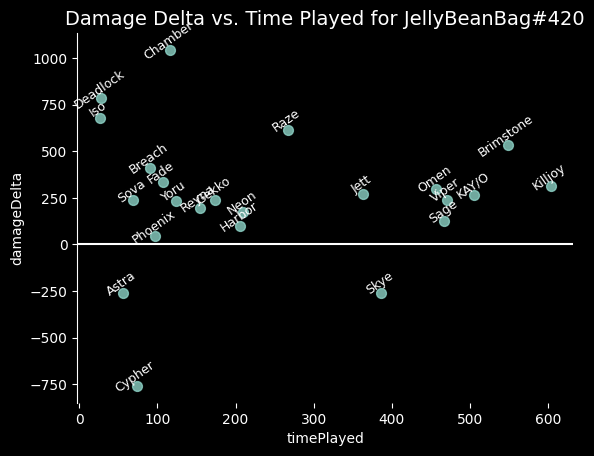

In [ ]:
# @title timePlayed vs damageDelta

df2.plot(kind='scatter', x='timePlayed', y='damageDelta', s=50, alpha=.8)
plt.gca().spines[['top', 'right','bottom']].set_visible(False)
plt.title('Damage Delta vs. Time Played for ' + inputName + '#' + inputTag, fontsize=14)

# Add a horizontal line at y=0
plt.axhline(0, color='white', linestyle='-')

# Annotate each point with agent names
for index, row in df2.iterrows():
    plt.annotate(row['_id'], (row['timePlayed'], row['damageDelta']), ha='center', va='center', fontsize=9, xytext=(-1, 7.0), textcoords='offset points', rotation=35)


# Show the plot
plt.show()

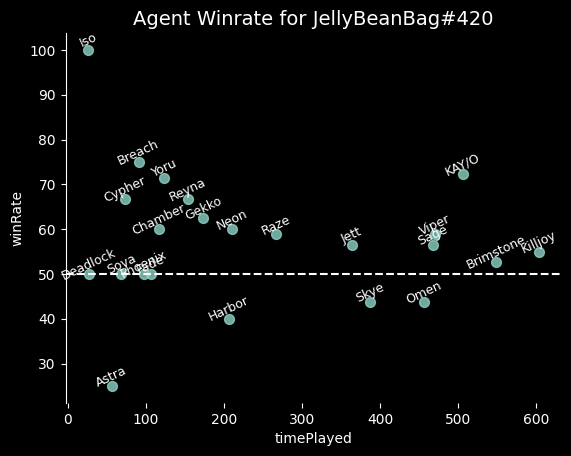

In [ ]:
# @title timePlayed vs winrate

df4.plot(kind='scatter', x='timePlayed', y='winRate', s=50, alpha=.8)
plt.gca().spines[['top', 'right','bottom']].set_visible(False)
plt.title('Agent Winrate for ' + inputName + '#' + inputTag, fontsize=14)

# Add a horizontal line at y=0
plt.axhline(50, color='white', linestyle='--')

# Annotate each point with agent names
for index, row in df4.iterrows():
    plt.annotate(row['_id'], (row['timePlayed'], row['winRate']), ha='center', va='center', fontsize=9, xytext=(0, 7.0), textcoords='offset points', rotation=25)


# Show the plot
plt.show()

In [ ]:
df # Before trimming unwanted game modes. #MFD

,_id,countPlayed,avgLoadoutValue,avgRoundsPlayed,damageDone,damageTaken,avgGameLength,avgKills,avgDeaths,avgAssists,avgACS,avgHeadshots,avgBodyshots,avgLegshots
0,Swiftplay,255,3072.282353,7.337255,1113.705882,968.023529,12.227712,6.086275,5.254902,2.231373,236.626102,4.274510,15.945098,1.427451
1,Deathmatch,19,0.000000,1.000000,0.000000,0.000000,7.941228,27.736842,25.263158,3.789474,8454.578947,0.000000,0.000000,0.000000
2,Team Deathmatch,42,0.000000,1.000000,3422.000000,3539.404762,7.403175,18.642857,19.428571,5.571429,5310.476190,15.952381,31.642857,1.738095
3,Unrated,28,3336.535714,20.035714,3401.214286,2568.571429,32.614881,18.285714,13.214286,5.464286,256.694712,11.714286,48.321429,3.321429
4,Competitive,88,3439.352273,21.272727,2671.284091,2731.386364,35.398295,14.284091,14.522727,6.681818,196.200121,9.659091,42.465909,3.795455
5,Spike Rush,3,2493.000000,5.666667,827.333333,498.333333,9.261111,5.000000,3.333333,1.666667,231.942857,3.666667,19.000000,4.333333
6,Custom Game,1,2748.000000,23.000000,2578.000000,1618.000000,16.533333,12.000000,8.000000,2.000000,132.347826,6.000000,37.000000,7.000000
7,New Map,3,2868.000000,6.000000,1244.666667,716.666667,10.061111,8.333333,4.333333,1.000000,339.333333,5.000000,18.000000,1.000000


In [ ]:
# Delete custom games and new map stats.
indexID = df[ (df['_id'] == 'New Map') | (df['_id'] == 'Custom Game') | (df['_id'] == 'Spike Rush') | (df['_id'] == 'Deathmatch')].index
df.drop(indexID , inplace=True)

# Calculate percentage of accuracy
df['totalShots'] = df['avgHeadshots'] + df['avgBodyshots'] + df['avgLegshots']
df['pctHead'] = df['avgHeadshots']/df['totalShots']*100
df['pctBody'] = df['avgBodyshots']/df['totalShots']*100
df['pctLegs'] = df['avgLegshots']/df['totalShots']*100

df.drop(columns=['avgHeadshots','avgBodyshots','avgLegshots','totalShots'], inplace=True)

# Sort the games by game length.
df.sort_values(by=['avgGameLength'], ascending=False, inplace=True)

# Need to reset index from dropping rows
df.reset_index(drop=True, inplace=True)

# round all values to 2 decimal places
df = df.round(2)

In [ ]:
#if(debug==True):
df #See dataframe after trimming and processing.

,_id,countPlayed,avgLoadoutValue,avgRoundsPlayed,damageDone,damageTaken,avgGameLength,avgKills,avgDeaths,avgAssists,avgACS,pctHead,pctBody,pctLegs
0,Competitive,88,3439.35,21.27,2671.28,2731.39,35.40,14.28,14.52,6.68,196.20,17.27,75.94,6.79
1,Unrated,28,3336.54,20.04,3401.21,2568.57,32.61,18.29,13.21,5.46,256.69,18.49,76.27,5.24
2,Swiftplay,255,3072.28,7.34,1113.71,968.02,12.23,6.09,5.25,2.23,236.63,19.75,73.66,6.59
3,Team Deathmatch,42,0.00,1.00,3422.00,3539.40,7.40,18.64,19.43,5.57,5310.48,32.34,64.14,3.52


In [ ]:
# Initialize the app - incorporate a Dash Bootstrap theme
load_figure_template('darkly')
dbc_css = ('https://cdn.jsdelivr.net/gh/AnnMarieW/dash-bootstrap-templates@V1.0.4/dbc.min.css')
external_stylesheets = [dbc.themes.DARKLY, dbc_css]

app = Dash(__name__, external_stylesheets=external_stylesheets)

# Lay out of the app
app.layout = html.Div(id='outer-layer', children=[
  ThemeSwitchAIO(aio_id="theme", themes=[dbc.themes.DARKLY, dbc.themes.MINTY]),
  #html.H1(children='Title of Dash App', style={'textAlign':'center'}),
  # Dropdown menu
  dcc.Dropdown(id='dropdown-selection',
              options=[{'label': i, 'value': i} for i in df['_id'].unique()],
              value='Unrated',
              className='dbc'
  ),

  # HTML Table
  html.Div(id='data-table-container'),
  # Histogram of chosen game mode
  dcc.Graph(id='chosen-mode', figure={}),
  # Histogram of all gamemodes
  dcc.Graph(id='all-modes', figure={})
], className='dbc')


@app.callback(
    Output('outer-layer', 'className'),
    Input(ThemeSwitchAIO.ids.switch('theme'),'value'),
)
def update_theme(toggle):
  return 'dbc'

# callback to update the dropdown menu theme
@app.callback(
    Output('dropdown-selection', 'className'),
    Input(ThemeSwitchAIO.ids.switch("theme"), "value"),
)
def update_dropdown_theme(toggle):
    return 'dbc'



# callback to update the data table after user selection
@app.callback(
  Output('data-table-container', 'children'),
  Input('dropdown-selection', 'value'),
  Input(ThemeSwitchAIO.ids.switch("theme"), "value"),
)
def update_data_table(value, toggle):
  template = "dark" if toggle else "light"
  table = dbc.Table.from_dataframe(df, striped=True, bordered=True, hover=True, color=template)
  return table



# callback to update the graphs after user selection
@app.callback(
  Output('chosen-mode', 'figure'),
  Output('all-modes', 'figure'),
  Input('dropdown-selection', 'value'),
  Input(ThemeSwitchAIO.ids.switch("theme"), "value"),
)
def update_graph(value, toggle):
  dff = df[df._id==value]
  template = "darkly" if toggle else "minty"
  fig = (
        px.histogram(dff, x='_id', y='countPlayed', histfunc='sum', template=template),
        px.histogram(df, x='_id', y='countPlayed', histfunc='sum', template=template),
  )
  return fig




# Run the app
if __name__ == '__main__':
    app.run(debug=True)


<IPython.core.display.Javascript object>